<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_01_DNN%EA%B8%B0%EC%B4%88_%EA%B8%B0%EB%B3%B8%EB%A0%88%EC%9D%B4%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. DNN기초 - 기본 레이어
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 구성하는 레이어에 대해 이해한다.
    - 활성화 함수 종류를 구현하고 특징을 정리한다.
    - 그래디언트 소실에 대해 이해한다.

## 학습자료


- 케라스 창시자에게 배우는 딥러닝


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 선형 함수 (Linear)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-07.png?raw=true width=700>



### **| 모델 생성**

In [6]:
class LinearLayer():
    # 학습파라미터(W, b)의 shpae 설정 
    def __init__(self, d_in, d_out):
        W_shape =  (d_in, d_out)
        B_shape = d_out
        # 행렬 만들기
        self.W = np.random.normal(0, 1, W_shape) # 정규분포를 따르는 랜덤 값 (평균 0, 표준편차 1)
        self.B = np.zeros(B_shape) # Bias(덧셈), default값을 0
    
    def forward(self, X): 
        # X: (n_sample, d_in)
        return X @ self.W + self.B


layer1 = LinearLayer(d_in = 3, d_out = 3)
layer2 = LinearLayer(d_in = 3, d_out = 2)
print(layer1.W, layer1.B)
print(layer2.W, layer2.B)
X = np.array([[1,2,1]])
print(f'X: {X}, shape: {X.shape}:')
print(f'첫번째 계산결과:{layer1.forward(X)}')
print(f'두번째 계산결과:{layer2.forward(layer1.forward(X))}')

[[ 1.05304256 -1.25136433  1.21707899]
 [ 0.47118231  1.02793599  0.77281702]
 [ 0.1244011  -0.5188333   1.06659687]] [0. 0. 0.]
[[-0.37042122  0.49586985]
 [ 1.11343581  0.28846097]
 [ 2.147264    1.2959386 ]] [0. 0.]
X: [[1 2 1]], shape: (1, 3):
첫번째 계산결과:[[2.11980829 0.28567435 3.8293099 ]]
두번째 계산결과:[[7.75539739 6.09610541]]


In [28]:
class Model():
    def __init__(self):
        self.layer1 = LinearLayer(d_in = 3, d_out = 3)
        self.layer2 = LinearLayer(d_in = 3, d_out = 2)
    
    def predict(self, x):
        z = self.layer1.forward(x)
        y = self.layer2.forward(z) # 예측값
        return y
    
    # 학습 파라미터를 반환하는 함수
    def get_weights(self):
        return [self.layer1.W, self.layer1.B, self.layer2.W, self.layer2.B]
    
    # 학습 파라미터를 직접 정해주는 함수 
    def set_weights(self, new_weight_list):
        self.layer1.W = new_weight_list[0]
        self.layer1.B = new_weight_list[1]
        self.layer2.W = new_weight_list[2]
        self.layer2.B = new_weight_list[3]

* 모델 불러오기

In [29]:
model = Model()
model.predict(X)

array([[0.9292421 , 2.08367868]])

### **| 순전파 계산**

데이터와 학습파라미터의 값이 아래와 같을 때 Y값을 구하세요.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-11.png?raw=true width=800>
</p>

* 파라미터 정의

In [30]:
X = np.array([[1,2,1]]) # X shape: (1,3)
W1_ = np.array([1,1,-1,1,0.5, -1, 1,1,1]).reshape(3,3)
B1_ = np.array([0,0,0]).reshape(1,3)
W2_ = np.array([1, 0.5, -1, 0.5, 0, 1]).reshape(3,2)
B2_ = np.array([1, -0.5]).reshape(1,2)

* 학습 파라미터 확인

In [31]:
model.get_weights()

[array([[-0.79037485, -1.10096671, -1.62055528],
        [ 0.40636767, -0.49786906, -0.04102313],
        [ 0.67681695,  0.1246064 , -0.46287697]]),
 array([0., 0., 0.]),
 array([[ 0.38599966, -0.01427659],
        [-0.6592022 , -0.74893499],
        [ 0.29584767, -0.28478096]]),
 array([0., 0.])]

* 학습 파라미터 세팅

In [33]:
model.set_weights([W1_, B1_, W2_, B2_])
model.get_weights()

[array([[ 1. ,  1. , -1. ],
        [ 1. ,  0.5, -1. ],
        [ 1. ,  1. ,  1. ]]), array([[0, 0, 0]]), array([[ 1. ,  0.5],
        [-1. ,  0.5],
        [ 0. ,  1. ]]), array([[ 1. , -0.5]])]

* 예측 (순전파)

In [34]:
model.predict(X)

array([[2., 1.]])

## 활성 함수 (Activation)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-08.png?raw=true width=800>

* 비선형 함수를 사용하는 이유

> 선형함수인 $h(x)=cx$를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요.
이를 식으로 나타내면 $y(x)=h(h(h(x)))$가 됩니다. 이는 실은 $y(x)=ax$와 똑같은 식입니다.
$a=c3$이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다.
뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. **출처: [밑바닥부터 시작하는 딥러닝]**
 
* 어떤 활성화 함수를 써야할까

> ELU → LeakyReLU → ReLU → tanh → sigmoid 순으로 사용하라는 얘기도 있고, cs231n 강의에서는 ReLU를 먼저 쓰고 , 그다음으로 LeakyReLU나 ELU 같은 ReLU Family를 쓰며, sigmoid는 사용하지 말라고 하고 있다.
**출처: https://excelsior-cjh.tistory.com/177 [EXCELSIOR:티스토리]**

* 딥러닝에서 사용되는 활성화 함수의 종류

```
- Step Function # 예외 (최근에는 사용 x)
--------------------------
- Sigmoid : 예측 결과가 두개 클래스 중 하나
- Softmax : 예측 결과가 세개 이상 클래스 중 하나
만약 마지막 층에서 활성화 안쓰면 회귀
--- 마지막 층에서 사용 ---
- Tanh
- ReLU
- Leaky ReLU
- PReLU
- ELU
--- 중간 층에서 사용 ---
중간 층에서 사용될 때는 gradient(미분) 값이 중요
```


* 시각화를 위한 플롯팅 함수

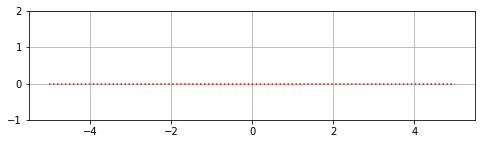

In [36]:
plt.rcParams['figure.figsize'] = (8, 2)
def plot_func(xs, ys, title=''):
  plt.plot(xs, ys)
  plt.title(title)
  plt.ylim(-1, 2)
  plt.hlines(xmin=-5, xmax=5, y=0, colors='r', linestyles=':')
  plt.grid()

plot_func(xs = [1], ys = [1])

### **| Sigmoid**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-15.png?raw=true width=500>





* 구현
\begin{align}
sigmoid(x) = \frac{1}{1+e^{-x}}
\end{align}


In [37]:
# 함수의 인풋 : 0차 텐서, 아웃풋 : 0차 텐서
def sigmoid(x):
    return 1/(1+ np.exp(-x))
sigmoid(5)

0.9933071490757153

* 미분
\begin{align}
\frac{d}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))
\end{align}


In [39]:
def sigmoid_grad(x):
    return sigmoid(x)*(1-sigmoid(x))
sigmoid_grad(0)

0.25

* 시각화

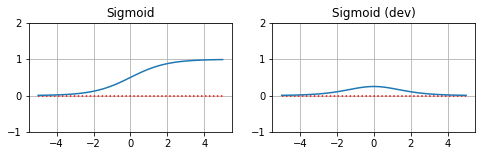

In [44]:
xs = np.linspace(-5, 5, 100) # -5부터, 5까지 100개의 숫자
plt.subplot(121); plot_func(xs, sigmoid(xs), title = 'Sigmoid')
plt.subplot(122); plot_func(xs, sigmoid_grad(xs), title = 'Sigmoid (dev)')



**Sigmoid 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```


### **| Softmax**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-16.png?raw=true width=550>


* 구현

\begin{align}
softmax(x) = \frac{e^{x_i}}{\sum_je^{x_j}}
\end{align}

In [45]:
# 여기서 x는 벡터
# 함수의 인풋 : 1차 텐서, 아웃풋: 1차 텐서 
def softmax(xs): # [1,2,1]
    exs = np.exp(xs) # [np.exp(1), np.exp(2), np.exp(1)]
    sum_ex = np.sum(exs) # 0차 텐서
    return exs / sum_ex # [np.exp(1)/sum_exs, np.exp(2)/sum_exs, np.exp(1)/sum_exs]
# 아웃풋의 요소들은 0~1 까지의 값을 가지고 다 더하면 1이 된다. 

softmax(np.array([1,2,1,1]))


array([0.1748777 , 0.47536689, 0.1748777 , 0.1748777 ])

* 미분


\begin{align}
\frac{x}{dx} Softmax(\vec{x}) =  
\begin{cases}
& Softmax(\vec{x})(1-Softmax(\vec{x})) \;\;\;\;\;\;\; \text{ if } i=j  
\\ & 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } i\neq j 
\end{cases}
\end{align}

In [ ]:
# 예측 [0.7, 0.2, 0.1] 실제 [1, 0, 0] -> 0 번째 클래스가 정답! (j = 0)

In [48]:
def softmax_grad(xs, j = 0):
    return (softmax(xs)* (1- softmax(xs)))[j] # j번째 아이만 사용
softmax_grad(np.array([0.7, 0.2, 1]))

0.223837075668383

* 시각화


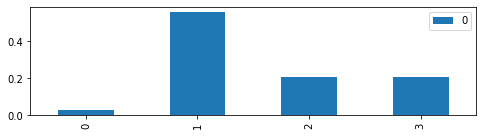

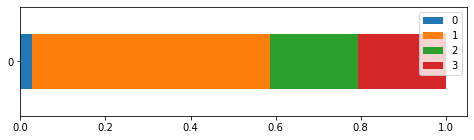

In [53]:
ys = softmax(np.array([-1,2,1,1]))
pd.DataFrame(ys).plot(kind = 'bar')
pd.DataFrame([ys]).plot(kind = 'barh', stacked = True)


**Softmax 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```


### **| Tanh**



* 구현

\begin{align}
tanh(x) = \frac{e^x - e^{-x}}{e^{x}+e^{-x}}
\end{align}

In [58]:
def tanh(x):
    return ( np.exp(x) - np.exp(-x)    ) / (  np.exp(x) + np.exp(-x)  )

tanh(np.array([-10, -1, 0, 1, 10]))

array([-1.        , -0.76159416,  0.        ,  0.76159416,  1.        ])

* 미분


\begin{align}
\frac{d}{dx} tanh(x) = (1-tanh(x))(1+tanh(x))) = 1-tanh(x)^2
\end{align}

In [59]:
def tanh_grad(x):
    return (  (1 - tanh(x) )*( 1 + tanh(x) )  )

tanh_grad(np.array([-10, -1, 0, 1, 10]))

array([8.24461475e-09, 4.19974342e-01, 1.00000000e+00, 4.19974342e-01,
       8.24461475e-09])

* 시각화

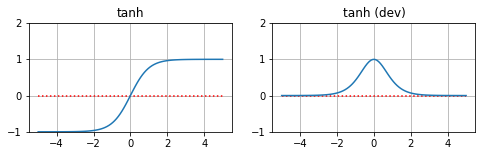

In [60]:
xs = np.linspace(-5, 5, 100)
plt.subplot(121); plot_func(xs, tanh(xs), title = 'tanh')
plt.subplot(122); plot_func(xs, tanh_grad(xs), title = 'tanh (dev)')


**Tanh 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```



### **| ReLU**


* 구현

\begin{align}
ReLU(x) = max(0, x)
\end{align}

`np.max` is just an alias for `np.amax`. 
This function only works on a single input array and finds the value of maximum element in that entire array (returning a scalar). 
Alternatively, it takes an `axis` argument and will find the maximum value along an axis of the input array (returning a new array).

```
>>> a = np.array([[0, 1, 6],
                  [2, 4, 1]])
>>> np.max(a)
6
>>> np.max(a, axis=0) # max of each column
array([2, 4, 6])
```

The default behaviour of `np.maximum` is to take two arrays and compute their element-wise maximum. Here, 'compatible' means that one array can be broadcast to the other.
```
>>> b = np.array([3, 6, 1])
>>> c = np.array([4, 2, 9])
>>> np.maximum(b, c)
array([4, 6, 9])
```

But `np.maximum` is also a universal function which means that it has other features and methods which come in useful when working with multidimensional arrays

```
>>> d = np.array([2, 0, 3, -4, -2, 7, 9])
>>> np.maximum.accumulate(d)
array([2, 2, 3, 3, 3, 7, 9])
```


In [77]:
def relu(x):
    return np.maximum(0,x)
relu(np.array([-1,0,1]))

array([0, 0, 1])

* 미분


\begin{align}
\frac{x}{dx} ReLU(x) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & 0 \;\; \text{ if } x <0  
\end{cases}
\end{align}


In [79]:
def relu_grad(x):
    return np.where(x >= 0, 1, 0)
relu_grad(np.array([-1,0,1]))

array([0, 1, 1])

* 시각화

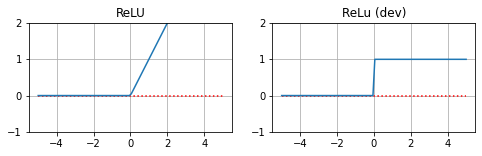

In [80]:
xs = np.linspace(-5, 5, 100)
plt.subplot(121); plot_func(xs, relu(xs), title = 'ReLU')
plt.subplot(122); plot_func(xs, relu_grad(xs), title = 'ReLu (dev)')



**ReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```



### **| LeackyReLU & PReLU**



* 구현

\begin{align}
LeackyReLU(x) = max(0.01  x, x)
\\
\\
\end{align}



\begin{align}
PReLU(x;\alpha) = max(\alpha  x, x)
\end{align}

In [81]:
def prelu(x, alpha = 0.01):
    return np.maximum(alpha * x, x)

* 미분

\begin{align}
\frac{x}{dx} PReLU(x;\alpha) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & \alpha \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [82]:
def prelu_grad(x, alpha = 0.01):
    return np.where(x >= 0, 1, alpha)

* 시각화
  * $\alpha$ 값이 각각 0.01, 0.1, 0.2 일때 플롯을 그리세요.

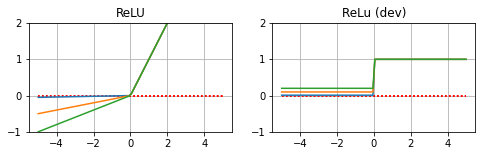

In [84]:
xs = np.linspace(-5, 5, 100)
plt.subplot(121); plot_func(xs, prelu(xs), title = 'ReLU'); plot_func(xs, prelu(xs, 0.1), title = 'ReLU');plot_func(xs, prelu(xs, 0.2), title = 'ReLU');
plt.subplot(122); plot_func(xs, prelu_grad(xs), title = 'ReLu (dev)'); plot_func(xs, prelu_grad(xs, 0.1), title = 'ReLu (dev)'); plot_func(xs, prelu_grad(xs, 0.2), title = 'ReLu (dev)')



**LeackReLU및 PReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
- # 알파 값은 보통 어떻게 정해지는가?
```



### **| ELU & SELU**


\begin{align}
ELU(x) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & (e^x-1) \;\;\;\;\;\; \text{ if } x <0  
\end{cases}
\\
\\
\end{align}



\begin{align}
SELU(x;\alpha) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha(e^x-1) \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 구현

In [88]:
def selu(x, alpha = 1):
    return np.maximum(x, alpha * (np.exp(x)-1))

6.38905609893065

* 미분

\begin{align}
\frac{x}{dx} ELU(x;\alpha) =  
\begin{cases}
& 1 \;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha e^{x} \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [86]:
def selu_grad(x, alpha = 1):
    return np.where( x >= 0, 1, alpha * np.exp(x))

* 시각화
  * $\alpha$ 값이 각각 0.1, 1, 2 일때 플롯을 그리세요.

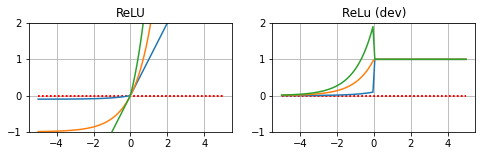

In [87]:
xs = np.linspace(-5, 5, 100)
plt.subplot(121)
plot_func(xs, selu(xs, 0.1), title = 'ReLU')
plot_func(xs, selu(xs), title = 'ReLU')
plot_func(xs, selu(xs, 2), title = 'ReLU')
plt.subplot(122)
plot_func(xs, selu_grad(xs, 0.1), title = 'ReLu (dev)')
plot_func(xs, selu_grad(xs), title = 'ReLu (dev)')
plot_func(xs, selu_grad(xs, 2), title = 'ReLu (dev)')



**ELU 및 ReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
- # 알파 값은 보통 어떻게 정해지는가?
```



## 그래디언트 소실 (Vaniching Gradient)
---
다음 질문에 답할 수 있도록 내용을 정리하세요.

1. 그래디언트 소실 개념
2. 딥러닝에서 그래디언트 값이 중요한 이유
3. 그래디언트 소실을 방지하기 위한 딥러닝 기법

```


```